In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
def drawplot(path:str, title:str, xname:str, yname:str, ax) -> None:
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='silver')
    plt.subplots_adjust(bottom=0.15)
    plt.xlabel(xname) 
    plt.ylabel(yname)
    plt.title(title)
    plt.legend()
    plt.savefig(f"{path}.eps", format='eps')
    plt.savefig(f"{path}.png", format='png')
    plt.show()

[[4.0000e-04 2.6000e-03 3.0700e-02 1.9643e+00 9.7300e-01 7.0071e+00
  4.0543e+00]
 [2.0000e-04 2.1000e-03 9.2500e-01 1.9432e+00 4.7000e-03 4.0611e+00
  4.8100e-02]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00]]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


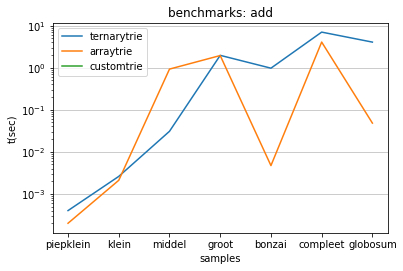

In [100]:
yss = np.loadtxt("../data/benchmarks_add.txt", delimiter=',')
yss = yss.T
print(yss)

x = np.array([i for i in range(len(yss[0]))])
fig, ax = plt.subplots()
ax.plot(x, yss[0], label="ternarytrie")
ax.plot(x, yss[1], label="arraytrie")
ax.plot(x, yss[2], label="customtrie")
plt.xticks(x, ["piepklein", "klein", "middel", "groot", "bonzai", "compleet", "globosum"])
plt.yscale("log")
drawplot("images/benchmarks_add", "benchmarks: add", "dataset", "t(sec)", ax)

/tmp/ipykernel_247718/4144592138.py:1: UserWarning: genfromtxt: Empty input file: "../data/benchmarks_afbrm.txt"
  yss = np.genfromtxt("../data/benchmarks_afbrm.txt", delimiter=8)


IndexError: index 0 is out of bounds for axis 0 with size 0

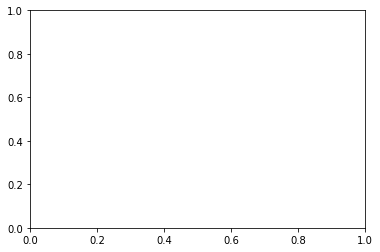

In [101]:

yss = np.genfromtxt("../data/benchmarks_afbrm.txt", delimiter=8)
yss = yss.T

x = np.array([0,1,2,3])
fig, ax = plt.subplots()
ax.plot(x, yss[0], label="ternarytrie")
ax.plot(x, yss[1], label="arraytrie")
ax.plot(x, yss[2], label="customtrie")
plt.xticks(x, ["1000", "10000", "100000", "500000"])
plt.yscale("log")
drawplot("images/benchmarks_afbrm", "benchmarks: add followed by remove", "dataset", "t(seconds)", ax)